# PROJET 2 : ANALYSE DE DONNEES EDUCATIVES

## Préparation de l'environnement : 

- importer les librairies et les bases de données
- sélectionner des paramètres d'affichage

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'missingno'

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option("display.max_rows", 200)
pd.options.mode.chained_assignment = None

In [3]:
data = pd.read_csv("EdStatsData.csv")
series = pd.read_csv("EdStatsSeries.csv")
country = pd.read_csv("EdStatsCountry.csv")
footnote = pd.read_csv("EdStatsFootnote.csv")
country_series = pd.read_csv("EdStatsCountry-Series.csv")

## Prise de connaissance des bases de donnée

In [4]:
data.info()
series.info()
country.info()
footnote.info()
country_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [5]:
data.head()
series.head()
country.head()
footnote.head()
country_series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [6]:
data.duplicated(['Country Code','Indicator Code']).sum()

0

Text(0.5, 1.0, 'taux de valeurs renseignées par an')

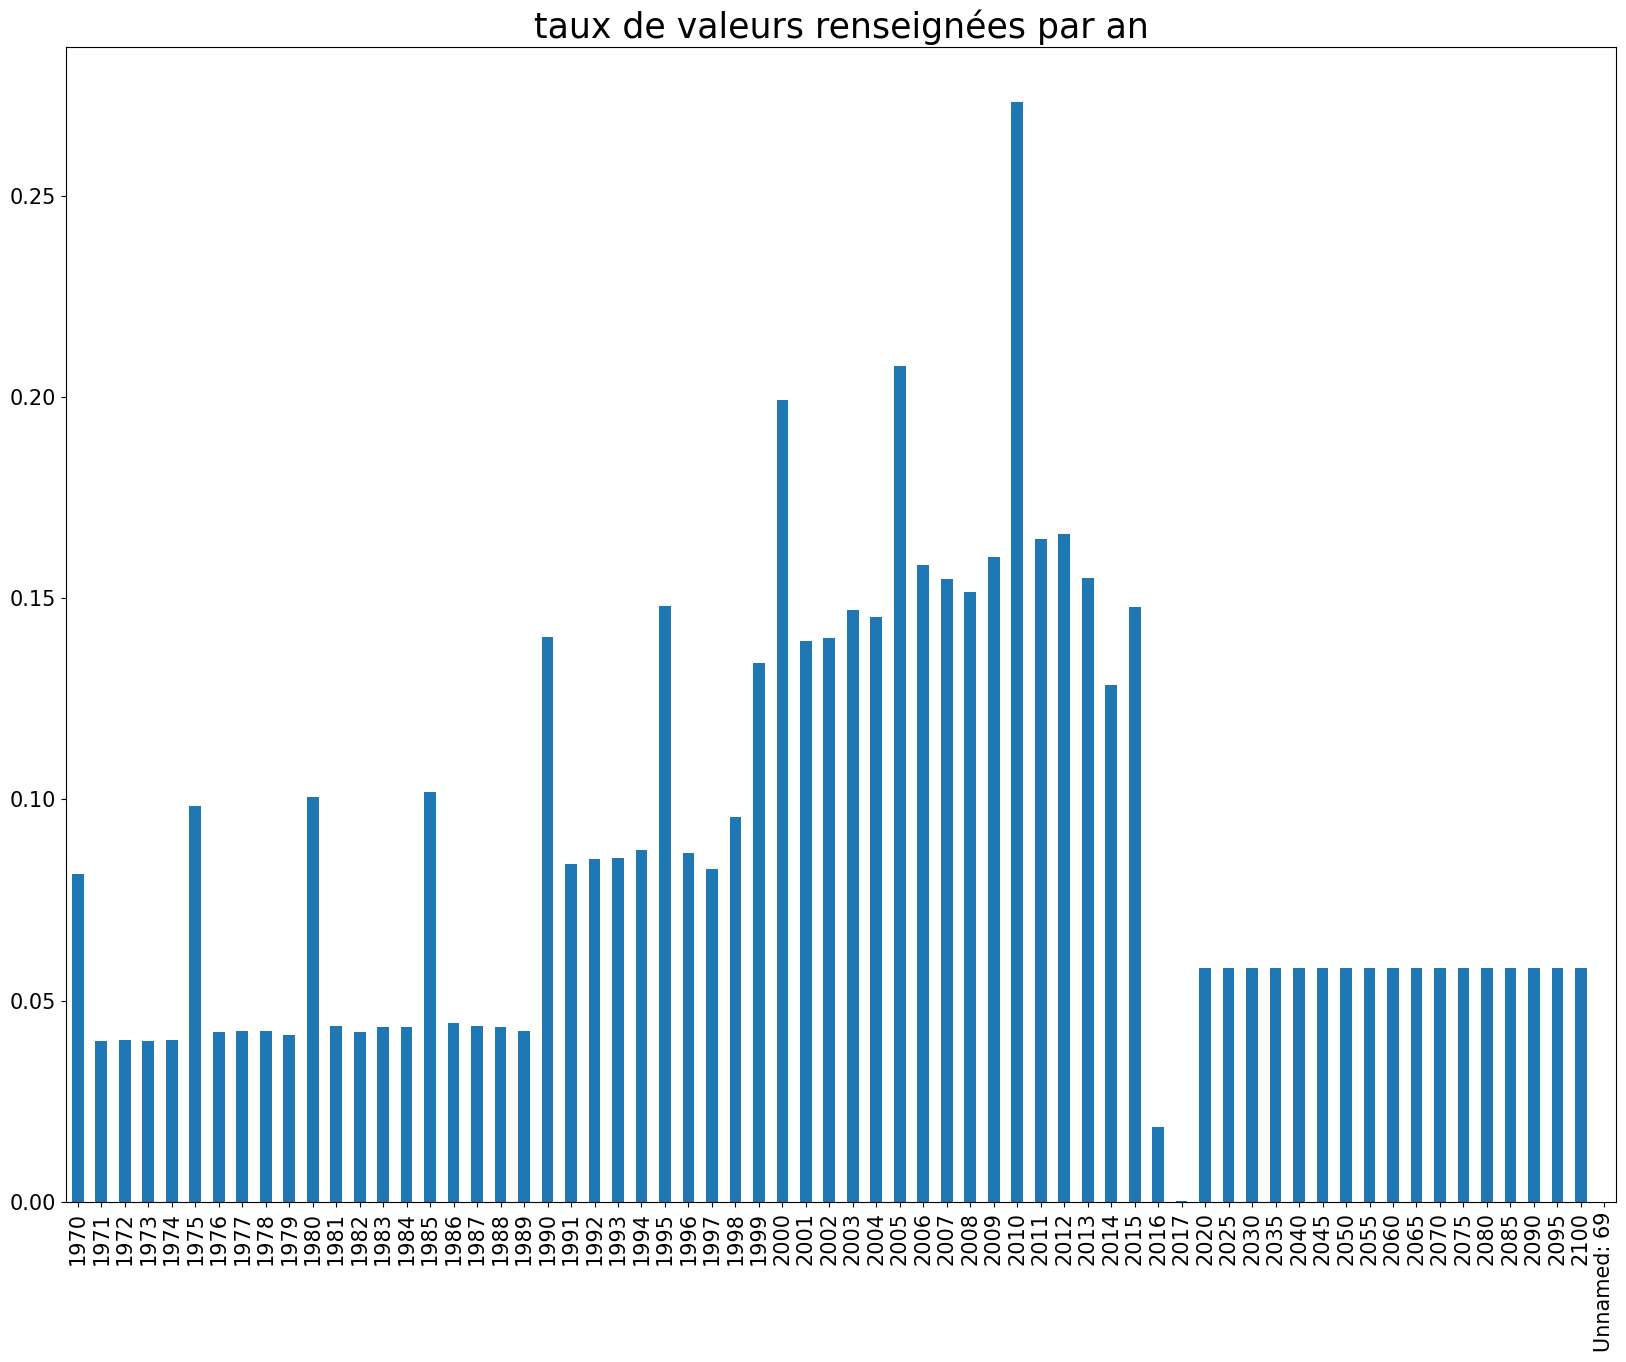

In [7]:
plt.figure(figsize=(20,15))
data_count = data.iloc[:,4:].notnull().sum(axis=0)/data.shape[0]
data_count.plot(kind = 'bar', width=0.5,fontsize=15)
plt.title('taux de valeurs renseignées par an',fontsize=25)

## Sélection des indicateurs pertinents dans le tableau 'country'

In [8]:
country = country[['Table Name','Region','Income Group','Special Notes']].rename(columns = {'Table Name':'Country Name'})

In [9]:
series.iloc[[611,1662,2825,2332,2589],0]

611     IT.NET.USER.P2
1662    NY.GDP.PCAP.CD
2825           UIS.E.3
2332       SE.TER.ENRL
2589       SP.POP.GROW
Name: Series Code, dtype: object

## Préparation du tableau principal data : 

    - Sélection des valeurs allant de 2010 à 2015
    - Sélection des 5 indicateurs choisis au préalable
    - Création d'une colonne recensant la dernière valeur de chaque indicateur par pays
    - Pivot de table pour faire apparaitre pour chaque pays, uniquement la dernière valeur observée des 5 indicateurs
    - Suppression des pays ayant plus de 2 observations manquantes
   

In [10]:
data.drop(data.iloc[ : ,50:], inplace=True, axis=1)
data.drop(data.iloc[ : ,4:44], inplace=True, axis=1)
data = data.loc[((data['Indicator Code'] == 'IT.NET.USER.P2')|(data['Indicator Code'] == 'NY.GDP.PCAP.CD')|(data['Indicator Code'] == 'UIS.E.3')|(data['Indicator Code'] == 'SE.TER.ENRL')|(data['Indicator Code'] == 'SP.POP.GROW'))]
data['last_value'] = data.ffill(axis=1, limit=5).iloc[:, -1] 
data = pd.pivot_table(data=data, index='Country Name', columns ='Indicator Name', values='last_value')
data = data.reset_index()
data = data.dropna(thresh=3)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 0 to 241
Data columns (total 6 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Country Name                                                          238 non-null    object 
 1   Enrolment in tertiary education, all programmes, both sexes (number)  196 non-null    float64
 2   Enrolment in upper secondary education, both sexes (number)           205 non-null    float64
 3   GDP per capita (current US$)                                          229 non-null    float64
 4   Internet users (per 100 people)                                       229 non-null    float64
 5   Population growth (annual %)                                          238 non-null    float64
dtypes: float64(5), object(1)
memory usage: 13.0+ KB


### Fusion des tableaux data et country pour pouvoir classifier les pays par région et groupe de revenu

In [11]:
data = data.merge(country,how='left',on="Country Name")
data = data[['Region','Income Group','Special Notes','Country Name','Enrolment in tertiary education, all programmes, both sexes (number)','Enrolment in upper secondary education, both sexes (number)','GDP per capita (current US$)','Internet users (per 100 people)','Population growth (annual %)']]
data.head()

,Region,Income Group,Special Notes,Country Name,"Enrolment in tertiary education, all programmes, both sexes (number)","Enrolment in upper secondary education, both sexes (number)",GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %)
0,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,262874.00,968769.00,569.58,8.26,2.94
1,Europe & Central Asia,Upper middle income,NaN,Albania,160527.00,151937.00,3934.90,63.25,-0.29
2,Middle East & North Africa,Upper middle income,NaN,Algeria,1289474.00,1332584.00,4160.22,38.20,1.92
3,East Asia & Pacific,Upper middle income,NaN,American Samoa,NaN,NaN,11865.96,NaN,0.18
4,Europe & Central Asia,High income: nonOECD,NaN,Andorra,501.00,1288.00,36038.27,96.91,-1.54


### Imputation des valeurs manquantes par la médiane en fonction de la région du pays

In [12]:
for col in data.iloc[:,4:].columns : 
    data.loc[:,col] = data.groupby('Region')[col].transform(lambda x: x.fillna(x.median()))

## Création d'un nouvel indicateur 

In [13]:
data['Enrolment in tertiary education, all programmes, both sexes (thousands)'] = data['Enrolment in tertiary education, all programmes, both sexes (number)']/1000
data['Enrolment in upper secondary education, both sexes (thousands)'] = data['Enrolment in upper secondary education, both sexes (number)']/1000
data['Total market size (thousands)'] = ((data['Enrolment in tertiary education, all programmes, both sexes (thousands)']+data['Enrolment in upper secondary education, both sexes (thousands)'])*(data['Internet users (per 100 people)']/100))
data.drop(['Enrolment in tertiary education, all programmes, both sexes (number)','Enrolment in upper secondary education, both sexes (number)'],axis=1,inplace=True)
data

,Region,Income Group,Special Notes,Country Name,GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),"Enrolment in tertiary education, all programmes, both sexes (thousands)","Enrolment in upper secondary education, both sexes (thousands)",Total market size (thousands)
0,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,569.58,8.26,2.94,262.87,968.77,101.73
1,Europe & Central Asia,Upper middle income,NaN,Albania,3934.90,63.25,-0.29,160.53,151.94,197.64
2,Middle East & North Africa,Upper middle income,NaN,Algeria,4160.22,38.20,1.92,1289.47,1332.58,1001.63
3,East Asia & Pacific,Upper middle income,NaN,American Samoa,11865.96,42.60,0.18,298.64,179.50,203.69
4,Europe & Central Asia,High income: nonOECD,NaN,Andorra,36038.27,96.91,-1.54,0.50,1.29,1.73
...,...,...,...,...,...,...,...,...,...,...
233,Middle East & North Africa,Lower middle income,NaN,West Bank and Gaza,2865.81,57.42,2.92,221.02,142.06,208.50
234,NaN,NaN,World aggregate.,World,NaN,NaN,NaN,NaN,NaN,NaN
235,Middle East & North Africa,Lower middle income,Based on official government statistics and In...,"Yemen, Rep.",1401.90,24.09,2.52,267.50,701.98,233.50
236,Sub-Saharan Africa,Lower middle income,National accounts data have rebased to reflect...,Zambia,1313.89,21.00,3.02,56.68,148.23,43.03


### Distinction des valeurs concernant les pays, les régions, les groupes de revenu, et les agrégats calculés

In [14]:
data_country = data.loc[(data['Region'].notna()), :]
data_aggregates = data.loc[data['Income Group'].isna(),:]
data_region = data.groupby(by='Region').sum()
data_income = data.groupby(by='Income Group').sum()
data_country.head()

,Region,Income Group,Special Notes,Country Name,GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),"Enrolment in tertiary education, all programmes, both sexes (thousands)","Enrolment in upper secondary education, both sexes (thousands)",Total market size (thousands)
0,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,569.58,8.26,2.94,262.87,968.77,101.73
1,Europe & Central Asia,Upper middle income,NaN,Albania,3934.90,63.25,-0.29,160.53,151.94,197.64
2,Middle East & North Africa,Upper middle income,NaN,Algeria,4160.22,38.20,1.92,1289.47,1332.58,1001.63
3,East Asia & Pacific,Upper middle income,NaN,American Samoa,11865.96,42.60,0.18,298.64,179.50,203.69
4,Europe & Central Asia,High income: nonOECD,NaN,Andorra,36038.27,96.91,-1.54,0.50,1.29,1.73


# Analyse statistique des variables et corrélations par pays, région et groupe de revenu.

In [15]:
data_country.describe()


,GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),"Enrolment in tertiary education, all programmes, both sexes (thousands)","Enrolment in upper secondary education, both sexes (thousands)",Total market size (thousands)
count,207.00,207.00,207.00,207.00,207.00,207.00
mean,15543.80,48.84,1.33,1085.61,1206.11,1129.10
std,24049.33,28.05,1.24,4116.98,5060.19,4001.91
min,300.68,1.08,-2.47,0.19,0.35,0.59
25%,2115.84,21.85,0.50,72.25,84.73,41.60
50%,5814.86,50.30,1.19,216.47,179.50,150.62
75%,17088.23,72.83,2.20,421.75,632.58,568.87
max,168146.02,98.32,5.86,43367.39,55228.68,43799.54


### Etude des corrélations entre les variables 

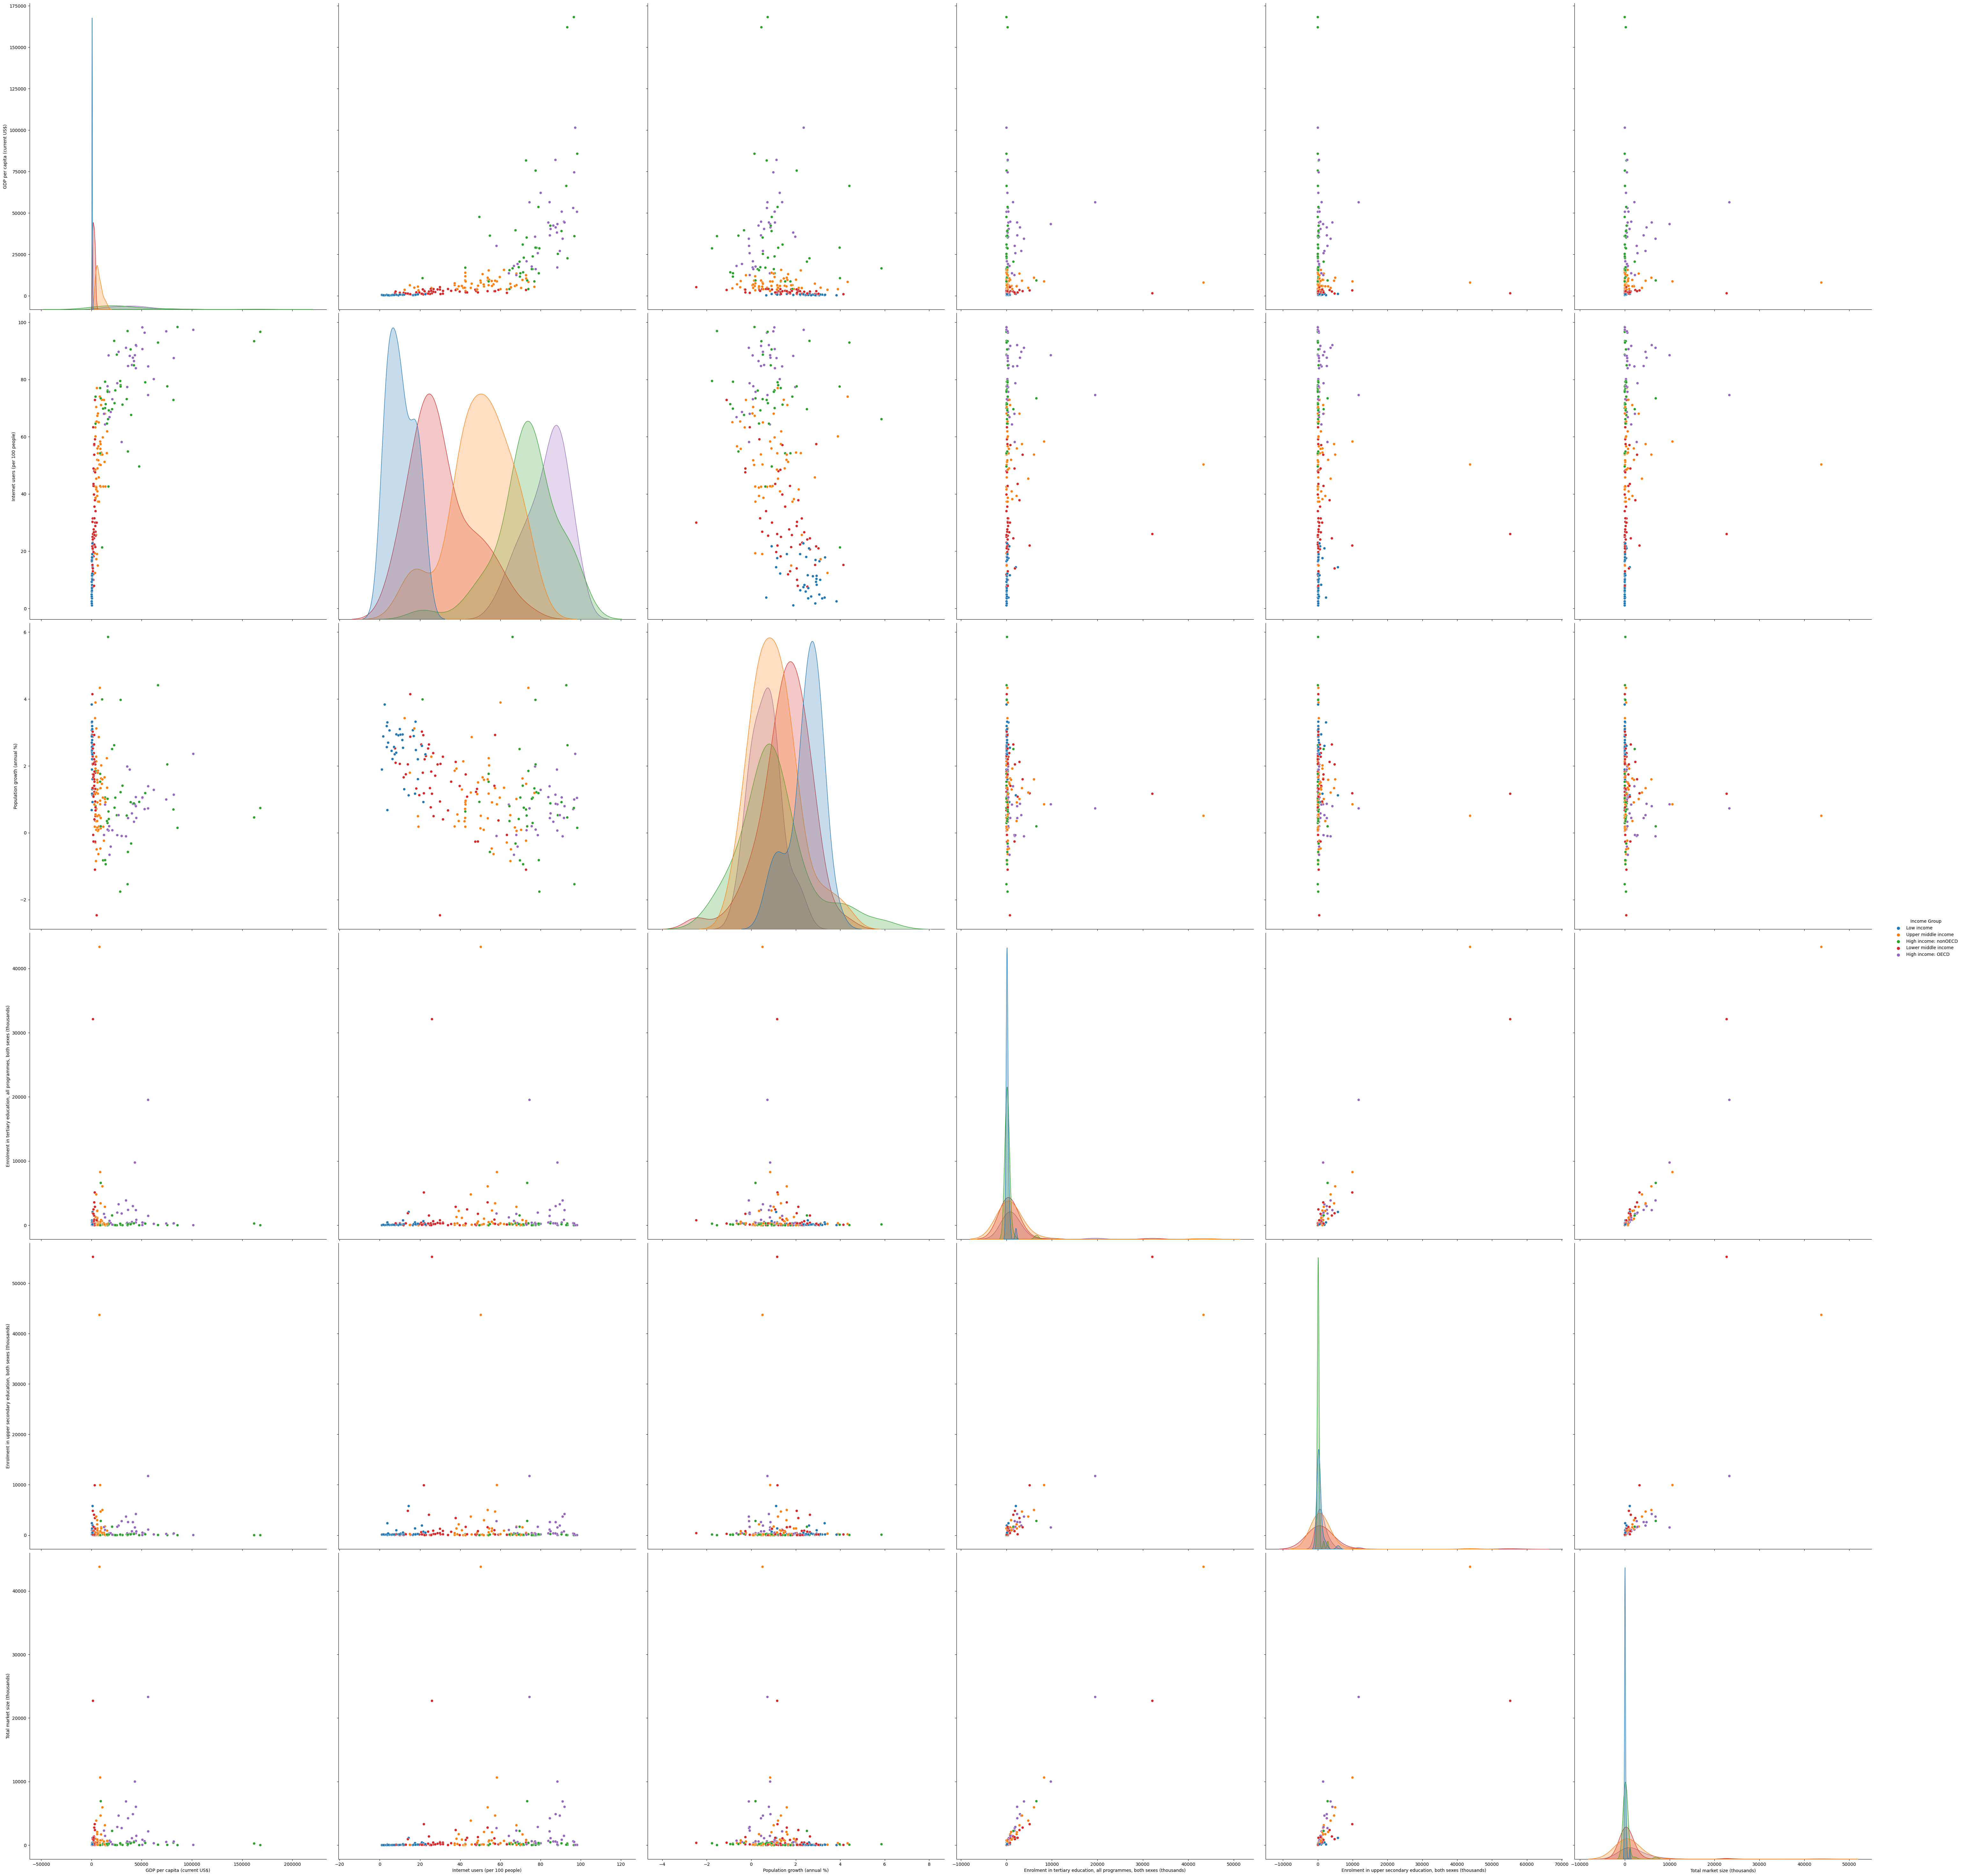

In [16]:
sns.pairplot(data_country,height=10,hue='Income Group')

In [17]:
data_country.sort_values('Total market size (thousands)')


,Region,Income Group,Special Notes,Country Name,GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),"Enrolment in tertiary education, all programmes, both sexes (thousands)","Enrolment in upper secondary education, both sexes (thousands)",Total market size (thousands)
219,Latin America & Caribbean,High income: nonOECD,NaN,Turks and Caicos Islands,8740.97,54.22,1.76,0.29,0.80,0.59
166,East Asia & Pacific,Upper middle income,Fiscal year ends on September 30; reporting pe...,Palau,13981.84,42.60,0.92,0.86,1.12,0.84
188,Latin America & Caribbean,High income: nonOECD,NaN,Sint Maarten (Dutch part),8740.97,54.22,1.53,0.19,1.51,0.93
180,Europe & Central Asia,High income: nonOECD,NaN,San Marino,47610.99,49.60,0.92,0.87,1.46,1.16
62,Sub-Saharan Africa,Low income,"April 2013 database update: Based on IMF data,...",Eritrea,582.78,1.08,1.89,12.55,113.11,1.36
...,...,...,...,...,...,...,...,...,...,...
35,North America,High income: OECD,Fiscal year end: March 31; reporting period fo...,Canada,43315.70,88.47,0.85,9766.35,1531.39,9995.11
27,Latin America & Caribbean,Upper middle income,NaN,Brazil,8757.21,58.33,0.85,8285.48,9949.58,10636.14
95,South Asia,Lower middle income,Fiscal year end: March 31; reporting period fo...,India,1596.47,26.00,1.17,32107.42,55228.68,22707.38
225,North America,High income: OECD,Fiscal year end: September 30; reporting perio...,United States,56469.01,74.55,0.73,19531.73,11736.32,23311.64


<AxesSubplot:>

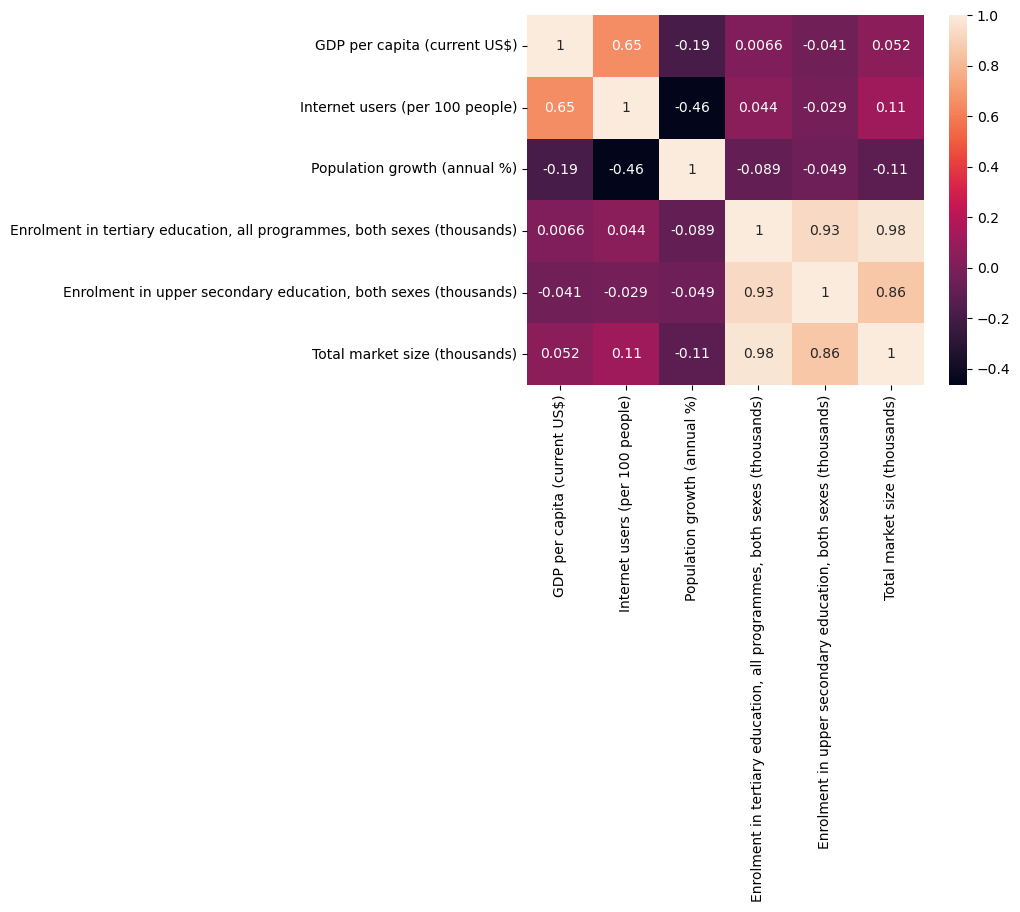

In [18]:
sns.heatmap(data_country.corr(),annot=True)


### Etude de la distribution des variables

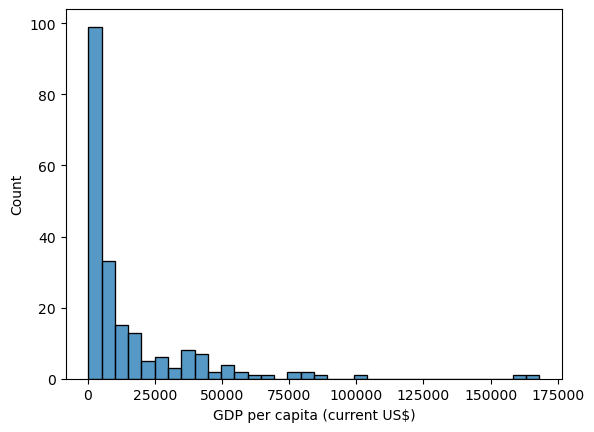

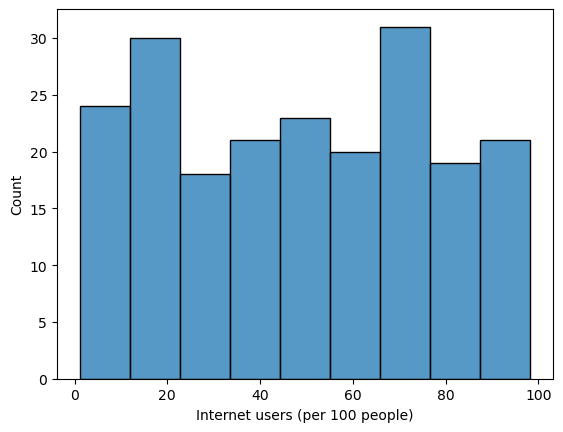

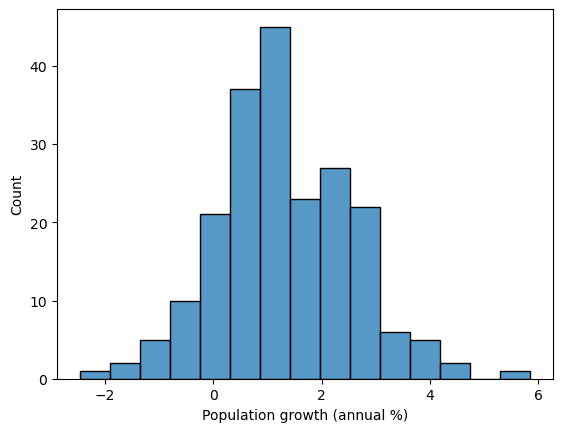

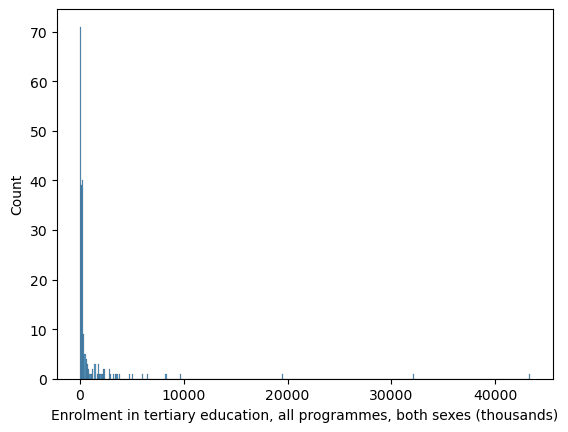

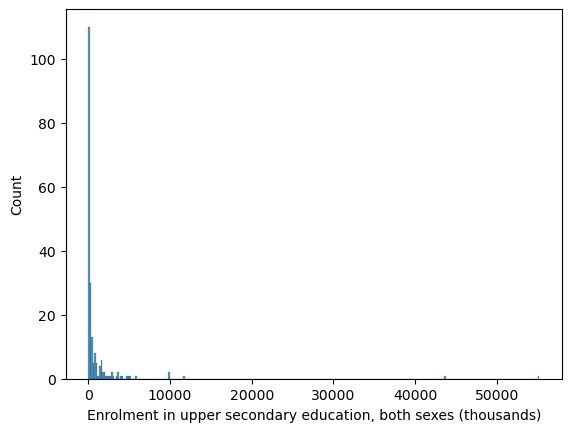

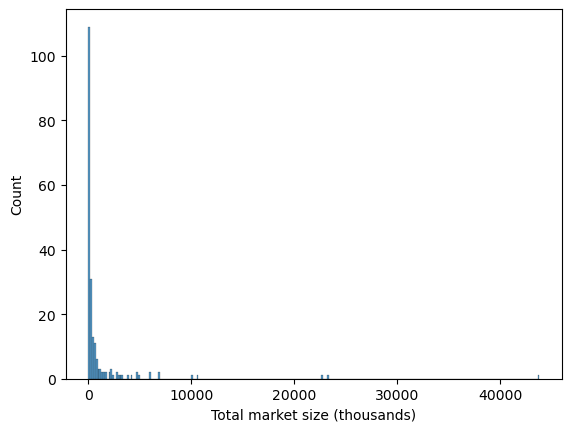

In [19]:
for col in data_country.iloc[:,4:].columns : 
    sns.histplot(data_country[col])
    plt.show()

<Figure size 1000x600 with 0 Axes>

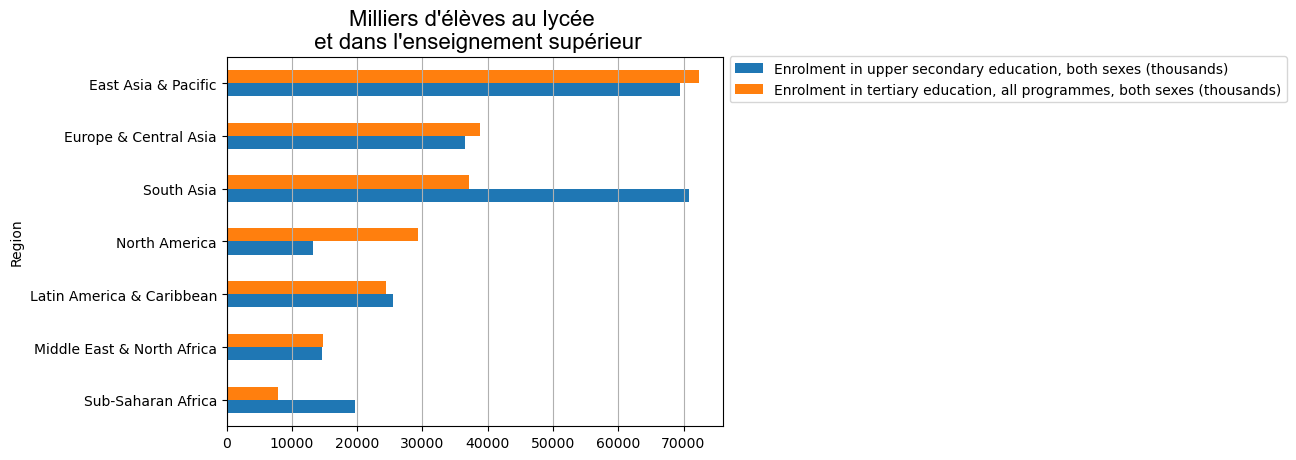

<Figure size 1000x600 with 0 Axes>

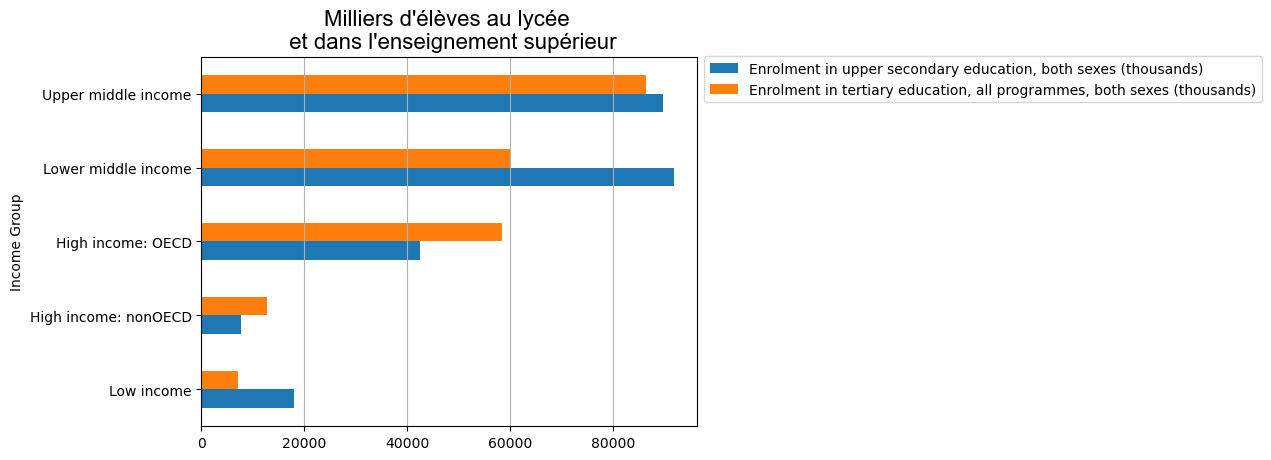

In [20]:
x = [data_region, data_income]
for df in x : 
    df.sort_values('Enrolment in tertiary education, all programmes, both sexes (thousands)', inplace=True)
    plt.figure(figsize=(10,6))
    df[['Enrolment in upper secondary education, both sexes (thousands)','Enrolment in tertiary education, all programmes, both sexes (thousands)']].plot.barh()
    plt.ticklabel_format(style='plain', useOffset=False, axis='x')
    plt.title("Milliers d'élèves au lycée \n et dans l'enseignement supérieur", fontname = 'Arial', fontsize = 16)
    plt.grid(axis='x')
    plt.legend(bbox_to_anchor=(1, 1.02))


## Classement de pays en fonction de la taille totale de leur marché

In [21]:
data_country["Rank"] = data_country["Total market size (thousands)"].rank()

data_country.sort_values("Rank", inplace = True)


## Sélection des 10 meilleurs pays selon notre problématique

In [22]:
top_10_data_country = data_country.tail(10).set_index('Country Name')
top_10_data_country

,Region,Income Group,Special Notes,GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),"Enrolment in tertiary education, all programmes, both sexes (thousands)","Enrolment in upper secondary education, both sexes (thousands)",Total market size (thousands),Rank
Country Name,,,,,,,,,,
Germany,Europe & Central Asia,High income: OECD,A simple multiplier is used to convert the nat...,41323.92,87.59,0.87,2977.78,2579.95,4868.01,198.00
Turkey,Europe & Central Asia,Upper middle income,NaN,10984.77,53.74,1.60,6062.89,4995.62,5943.39,199.00
United Kingdom,Europe & Central Asia,High income: OECD,NaN,44305.55,92.00,0.79,2352.93,4195.08,6024.19,200.00
Japan,East Asia & Pacific,High income: OECD,Fiscal year end: March 31; reporting period fo...,34474.14,91.06,-0.11,3862.46,3682.92,6870.67,201.00
Russian Federation,Europe & Central Asia,High income: nonOECD,NaN,9329.30,73.41,0.19,6592.42,2823.00,6911.86,202.00
Canada,North America,High income: OECD,Fiscal year end: March 31; reporting period fo...,43315.70,88.47,0.85,9766.35,1531.39,9995.11,203.00
Brazil,Latin America & Caribbean,Upper middle income,NaN,8757.21,58.33,0.85,8285.48,9949.58,10636.14,204.00
India,South Asia,Lower middle income,Fiscal year end: March 31; reporting period fo...,1596.47,26.00,1.17,32107.42,55228.68,22707.38,205.00
United States,North America,High income: OECD,Fiscal year end: September 30; reporting perio...,56469.01,74.55,0.73,19531.73,11736.32,23311.64,206.00


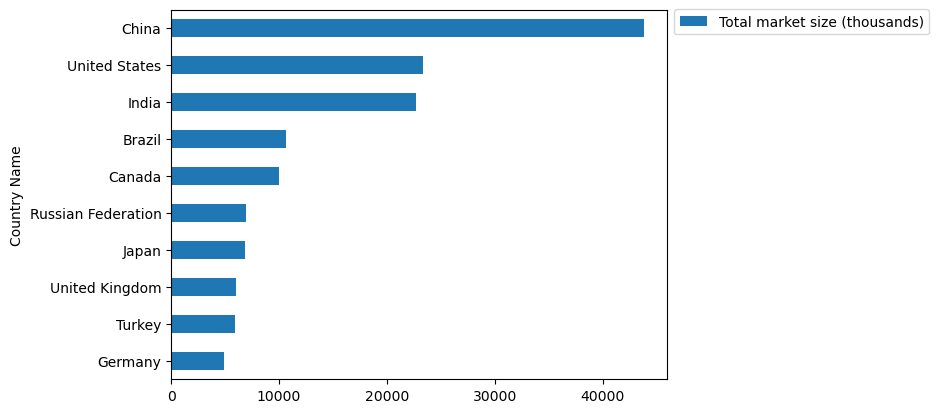

In [23]:
top_10_data_country.sort_values('Total market size (thousands)', inplace=True)
top_10_data_country[['Total market size (thousands)']].plot(kind='barh')
plt.legend(bbox_to_anchor=(1, 1.02))

## Comparaison des 10 pays pré-selectionnés à l'aune de 5 indicateurs de la Banque Mondiale

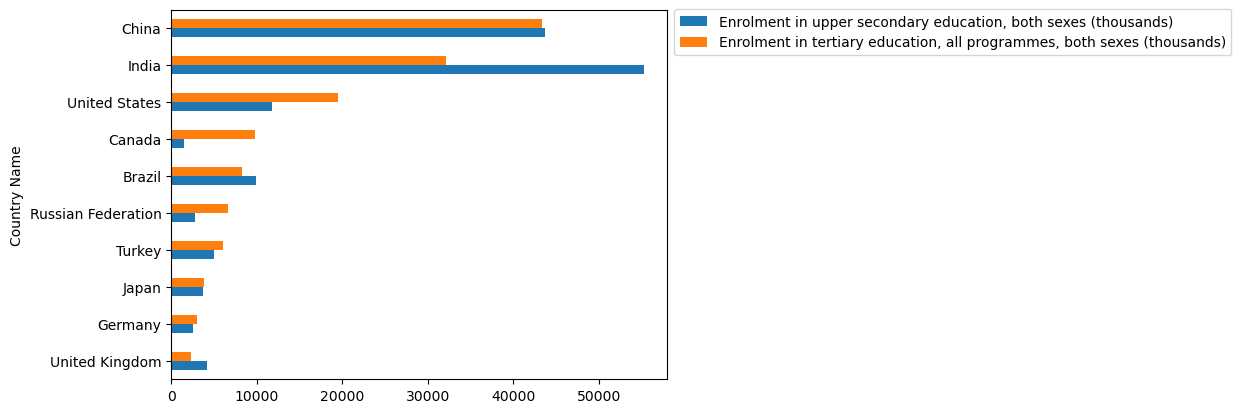

In [24]:
top_10_data_country.sort_values('Enrolment in tertiary education, all programmes, both sexes (thousands)', inplace=True)
top_10_data_country[['Enrolment in upper secondary education, both sexes (thousands)','Enrolment in tertiary education, all programmes, both sexes (thousands)']].plot(kind='barh')
plt.legend(bbox_to_anchor=(1, 1.02))

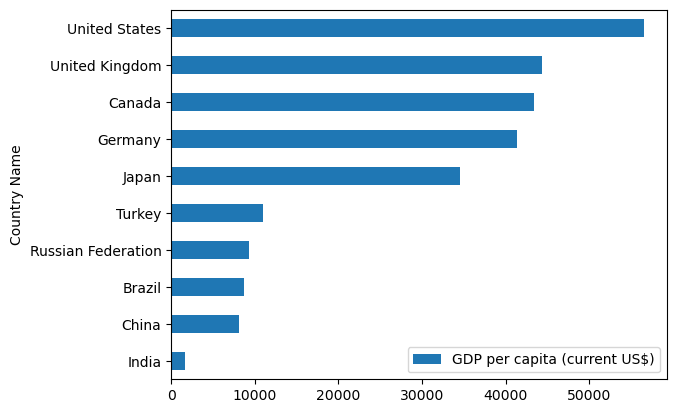

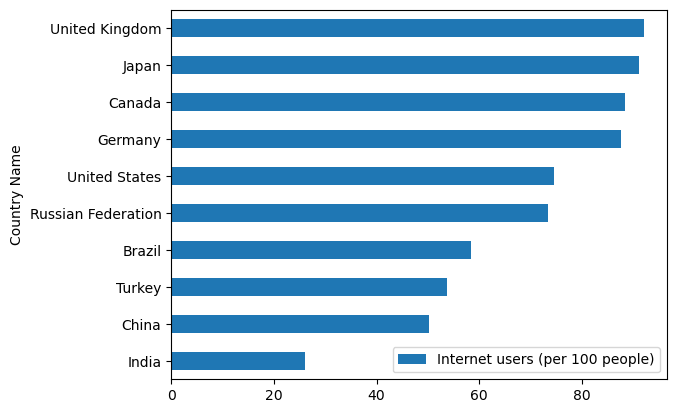

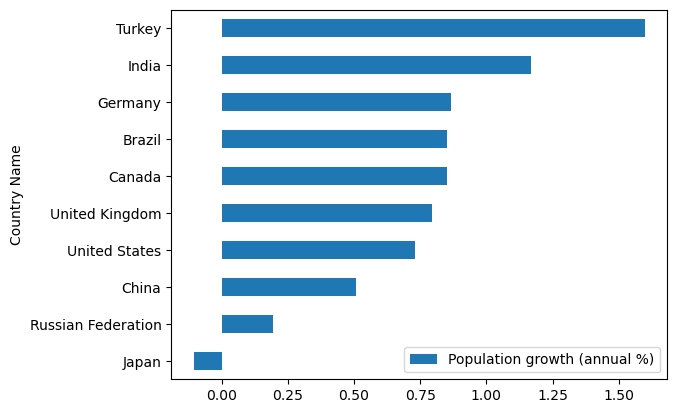

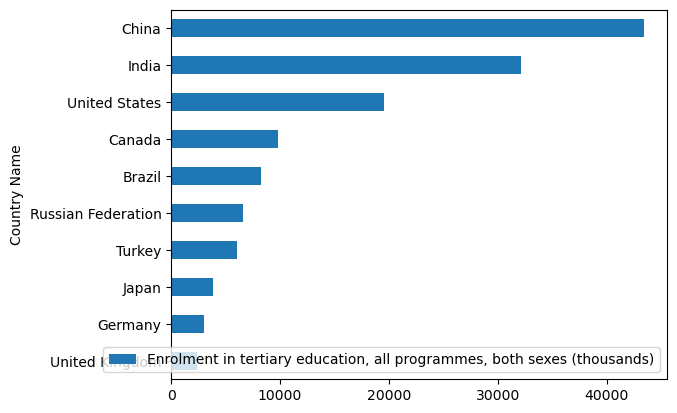

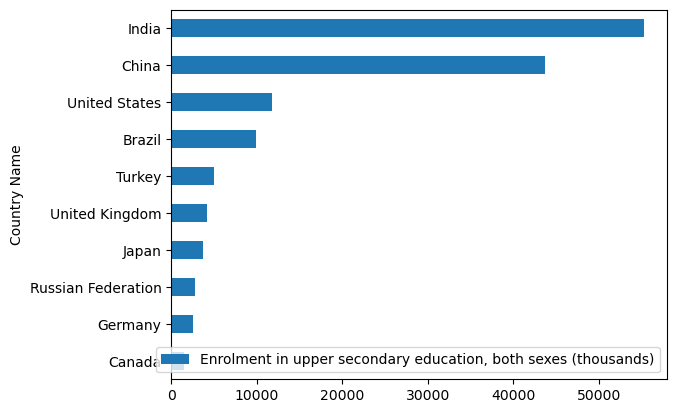

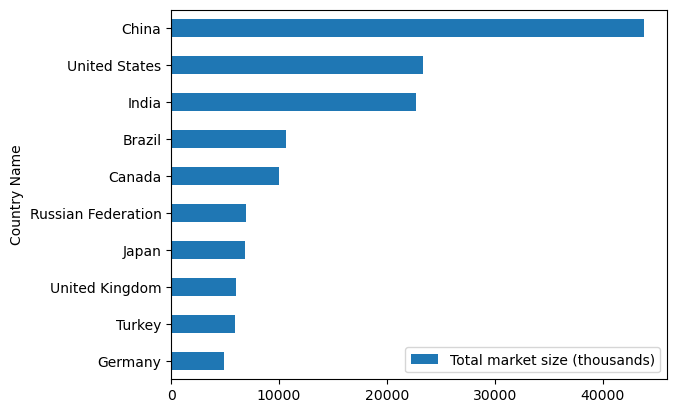

In [25]:
for col in top_10_data_country.iloc[:,3:9].columns : 
    top_10_data_country.sort_values(col, inplace=True)
    top_10_data_country[[col]].plot(kind='barh')
    plt.legend(loc='lower right')
    plt.show()